In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.datasets.vindr_local_context import VINDR_Dataset
from src.config import image_size

from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


## Data Loading and Preprocessing

In this section, we define transformations, specify dataset paths, and create a PyTorch DataLoader to handle batch processing.

### Define a series of transformations

In [2]:
transform = Compose([
#     ToTensor(),  # Convert image to a PyTorch tensor
    Resize((image_size, image_size), antialias=True),  # Resize image to image_sizeximage_size pixels while preserving quality
    Normalize(0.007, 0.01)  # Normalize pixel values with mean=0.007 and std=0.01
])

### Specify the file paths for annotations (CSV) and images

In [3]:
csv_path = '/data/vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/finding_annotations.csv'
images_path = '/data/vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/'

### Initialize dataset and dataloader

In [5]:
dataset = VINDR_Dataset(csv_path, images_path, local_context_size=512, transform=transform)
dataloader = DataLoader(dataset, batch_size=1)

torch.Size([1, 3, 256, 256])


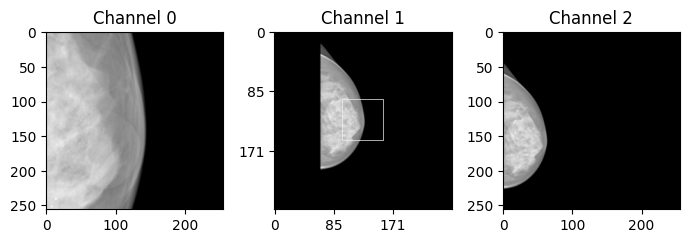

torch.Size([1, 3, 256, 256])


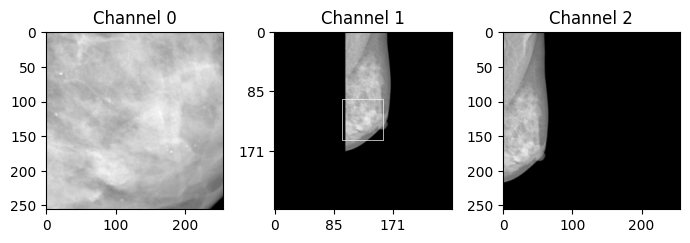

torch.Size([1, 3, 256, 256])


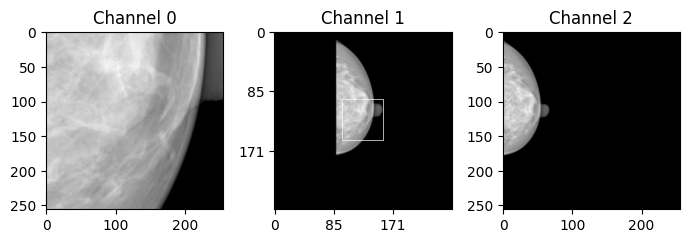

torch.Size([1, 3, 256, 256])


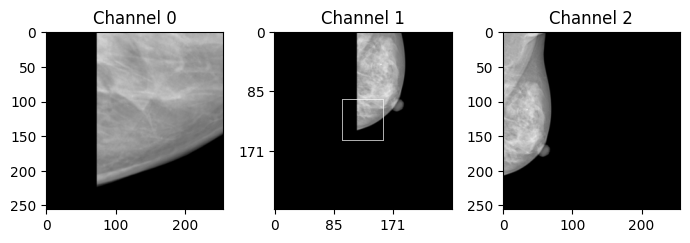

torch.Size([1, 3, 256, 256])


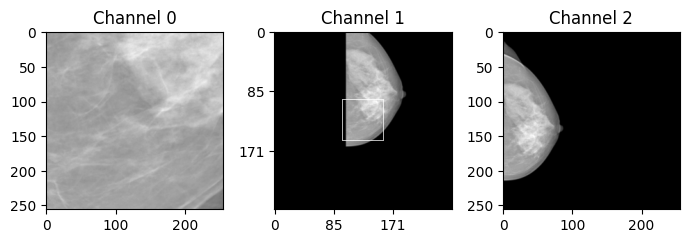

torch.Size([1, 3, 256, 256])


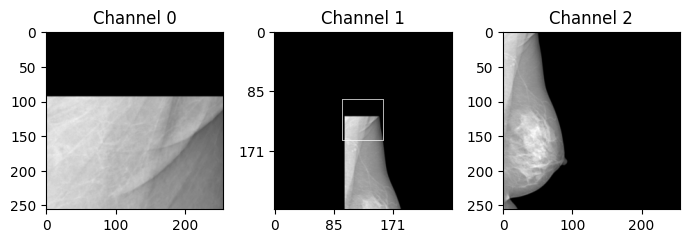

torch.Size([1, 3, 256, 256])


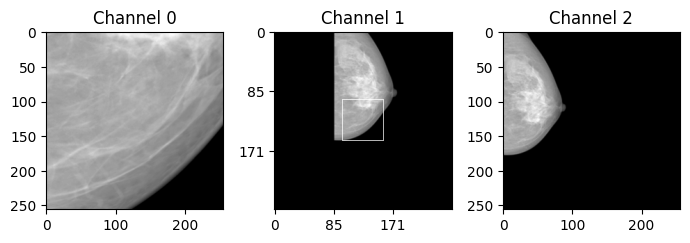

torch.Size([1, 3, 256, 256])


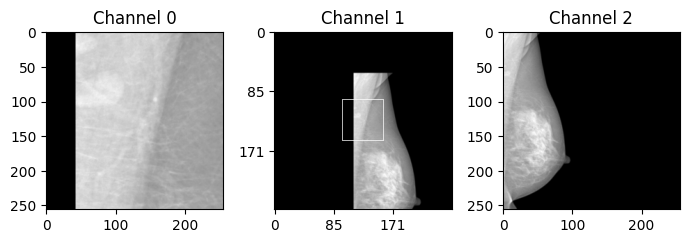

torch.Size([1, 3, 256, 256])


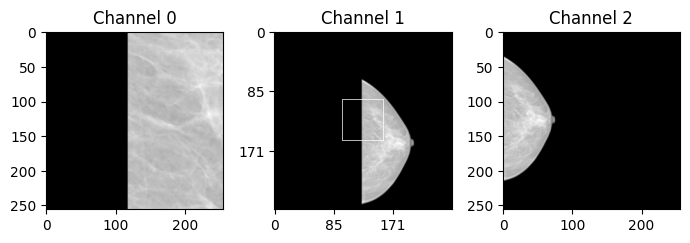

torch.Size([1, 3, 256, 256])


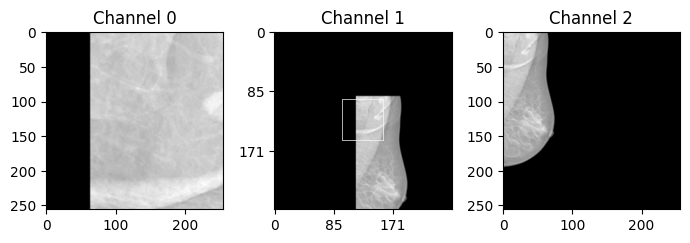

torch.Size([1, 3, 256, 256])


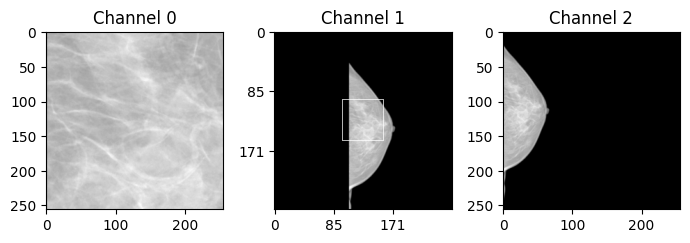

torch.Size([1, 3, 256, 256])


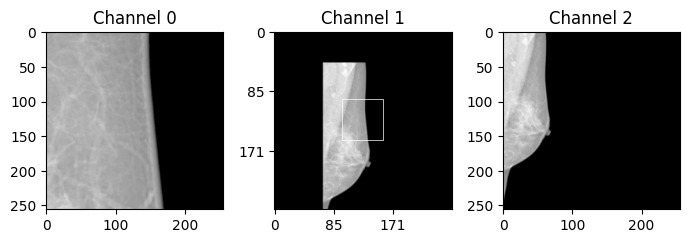

torch.Size([1, 3, 256, 256])


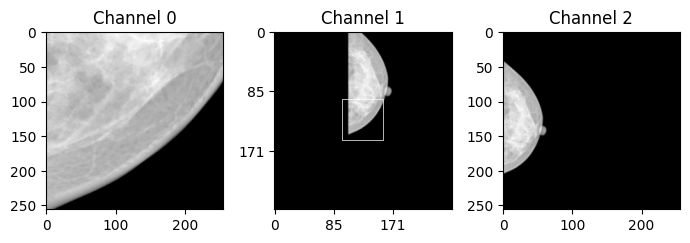

torch.Size([1, 3, 256, 256])


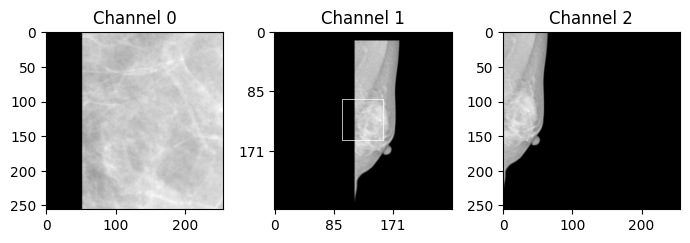

torch.Size([1, 3, 256, 256])


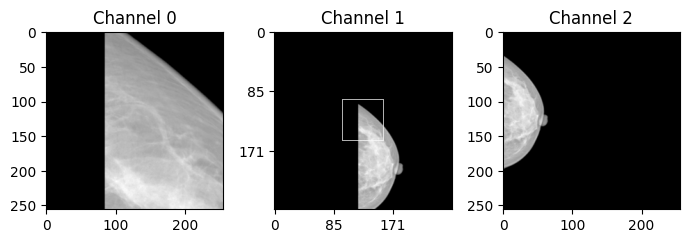

torch.Size([1, 3, 256, 256])


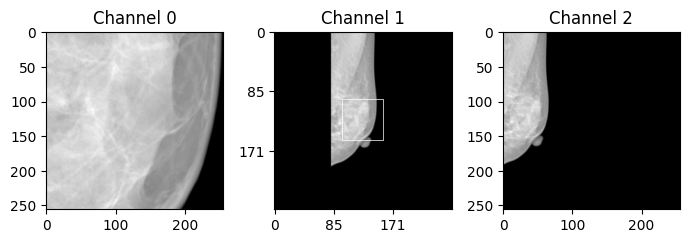

torch.Size([1, 3, 256, 256])


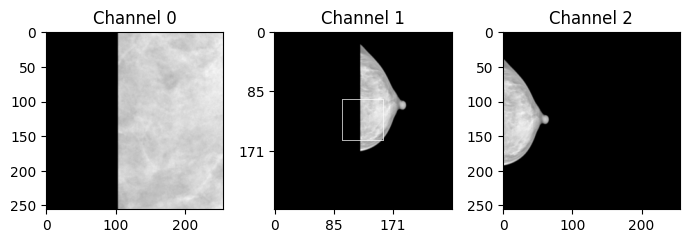

torch.Size([1, 3, 256, 256])


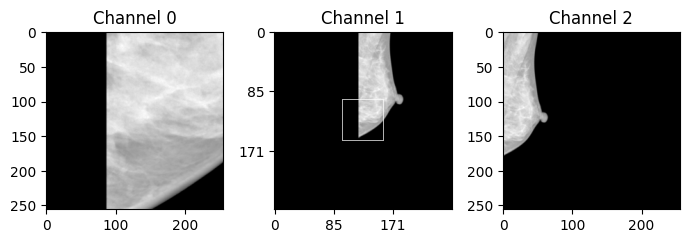

torch.Size([1, 3, 256, 256])


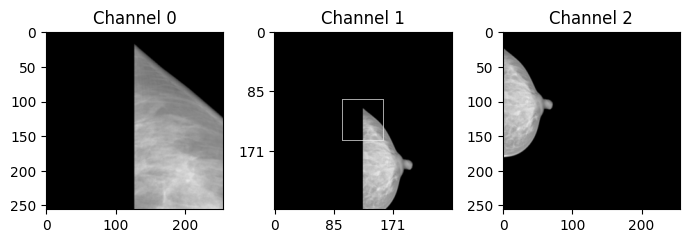

torch.Size([1, 3, 256, 256])


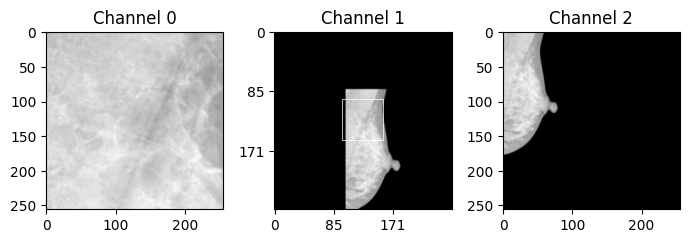

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np

for batch_idx, x in enumerate(dataloader):
    if batch_idx >= 20:  # Ograničavamo na 10 slika
        break
    
    print(x.shape)
    arr = x[0].numpy()  # Pretvaramo tensor u numpy array (dim: 3xHxW)
    
    fig, axes = plt.subplots(1, 3, figsize=(7, 5))  # Jedan red, tri slike
    
    for i in range(3):
        img = arr[i, :, :].copy()  # Kopiramo kanal slike
        
        # Na prvom kanalu (i=1), crtamo ivice kvadrata i dodajemo oznake
        if i == 1:
            h, w = img.shape
            size = int(256*768/3237)
            start_x, start_y = (w - size) // 2, (h - size) // 2
            end_x, end_y = start_x + size, start_y + size
            
            # Postavljamo ivice na max vrednost slike
            img[start_y, start_x:end_x] = img.max()  # Gornja ivica
            img[end_y-1, start_x:end_x] = img.max()  # Donja ivica
            img[start_y:end_y, start_x] = img.max()  # Leva ivica
            img[start_y:end_y, end_x-1] = img.max()  # Desna ivica

            # Dodajemo x_ticks i y_ticks na 85 i 171
            axes[i].set_xticks([0, 85, 171, 256])
            axes[i].set_yticks([0, 85, 171, 256])
        
        axes[i].imshow(img, cmap="gray", vmin=arr.min(), vmax=arr.max())
        axes[i].set_title(f"Channel {i}")
#         axes[i].axis("on" if i == 1 else "off")  # Ose samo za kanal 1
    
    plt.tight_layout()
    plt.show()
